## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

# Definição do problema

Este trabalho visa estimar os níveis de obesidade em indivíduos a partir de variáveis relacionadas aos hábitos alimentares e na condição física

# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Coleta e Análise Exploratória dos dados

#### Importação da base de dados:

In [3]:
path = "content\ObesityDataSet_raw_and_data_sinthetic.csv"

data = pd.read_csv(path)

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Alexandro\AppData\Local\Temp\ipykernel_14420\267910507.py:1: SyntaxWarning: invalid escape sequence '\O'
  path = "content\ObesityDataSet_raw_and_data_sinthetic.csv"


#### Visualização da base de dados:



In [4]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Análise**  
O dataset possui 17 variáveis, descritas a seguir:  
| Variável | Descrição | Tipo
| :--- | :---: | :--- |
| Gender                        | Genero                                                                        | Categórica nominal    |
| Age                           | Idade                                                                         | Categórica contínua   |
| Height                        | Altura                                                                        | Quantitativa contínua |
| Weight                        | Peso                                                                          | Quantitativa contínua |
| family_history_with_overweight| Membro da familia ja possui ou teve sobrepeso                                 | Categórica binária    |
| FAVC                          | Consome alimentos de teor calórico com frequência                             | Categórica binária    |
| FCVC                          | Inclusão de vegetais na refeição                                              | Categórica ordinal    |
| NCP                           | Quantidades de refeições principais por dia                                   | Quantitativa contínua |
| CAEC                          | Consumo de algo entre as refeições principais                                 | Categórica ordinal    |
| SMOKE                         | Fumante ou não fumante                                                        | Categórica binária    |
| CH2O                          | Quantidade de água consumida por dia                                          | Quantitativa contínua |
| SCC                           | Controle de calorias                                                          | Categórica binária    |
| FAF                           | Frequência de atividade física                                                | Quantitativa discreta |
| TUE                           | Uso de dispositivos tecnológicos (Celular, Videogames, TV, Computador e etc)  | Quantitativa contínua |
| CALC                          | Frequência de bebidas alcoólicas                                              | Categórica ordinal    |
| MTRANS                        | Meio de transporte utilizado                                                  | Categórica nominal    |
| NObeyesdad                    | Nível de obesidade                                                            | Categórica ordinal    |


#### Verificação de dados faltantes

In [8]:
print(f"Numero de dados faltantes: \n{data.isnull().sum()}")


Numero de dados faltantes: 
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# Distribuições

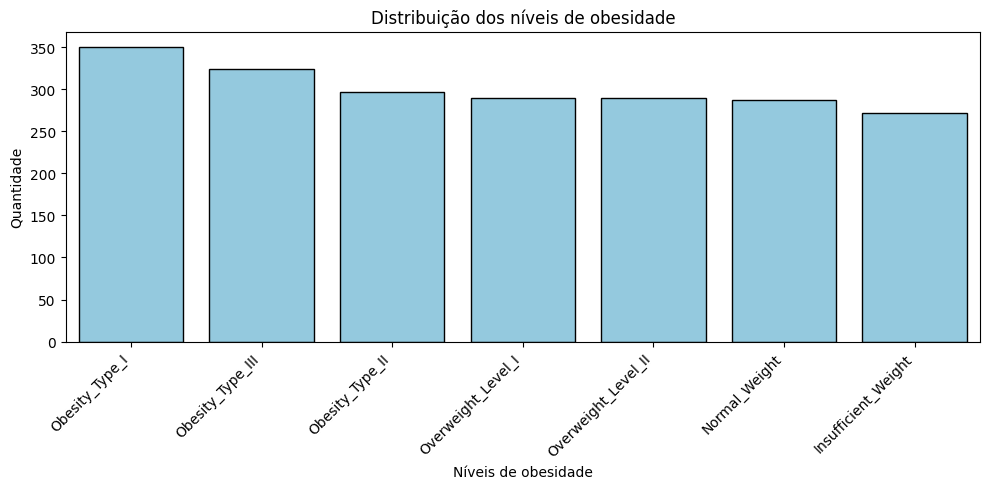

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [ ]:
# distribuição dos niveis de obesidade com valores nas barras
obesity_counts = data['NObeyesdad'].value_counts()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=obesity_counts.index, y=obesity_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição dos níveis de obesidade')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Níveis de obesidade')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

print(obesity_counts)

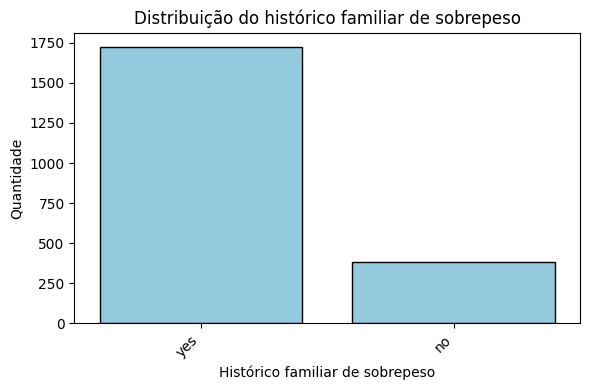

In [12]:
#distribuição de historico familiar de sobrepeso

family_history_counts = data['family_history_with_overweight'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=family_history_counts.index, y=family_history_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição do histórico familiar de sobrepeso')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Histórico familiar de sobrepeso')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

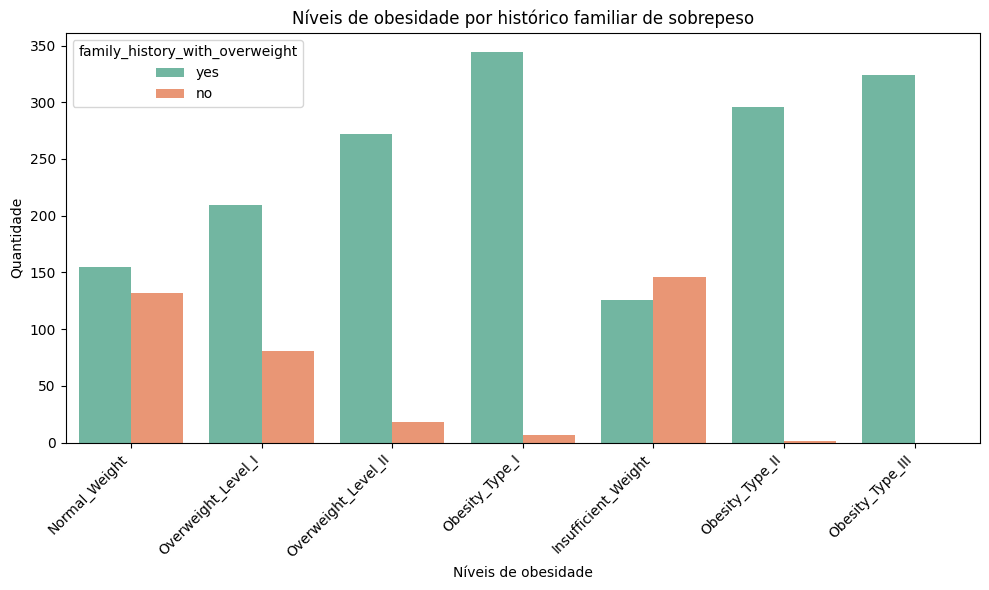

In [41]:
#distruição dos niveis de obesidade com o histórico familiar de sobrepeso

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='NObeyesdad', hue='family_history_with_overweight', palette='Set2')
plt.title('Níveis de obesidade por histórico familiar de sobrepeso')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Níveis de obesidade')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# 2. Preparação dos dados

# 3. Determinação da tarefa de Aprendizado de Máquina

# 4. Determinação da abordagem de validação cruzada

Justificativa que corrobore com a situação:

## 4.1. Determinação das Métricas de desempenho

Justificativa que corrobore com a situação:

# 5. Elaboração da Grade de busca

Justificativa

## 5.1. Definição dos Parâmetros

Justificativa

## 5.2. Definição dos Hiperparâmetros

Justificativa

# 6. Treinamento dos modelos

## 6.1. Testando os modelos

# 7. Análise de desempenho dos modelos

## 7.1. Análise Quantitativa

## 7.2. Análise Qualitativa